In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

# display all columns of the dataframe
pd.options.display.max_columns = None

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#Setting plotsize
plt.rcParams["figure.figsize"]=[10,5]

### The aim of this analysis is to establish purchasing patterns from the dataset that we have here; once we zero in on the items that are frequently bought together, further strategies can be built to increase revenue via those items

## Process Guide

1 Transactional data from a grocery over 2 years, 2014 and 2015, is considered for this project.

2 Variables were identified, the data was thoroughly checked for missing values and basic insights were generated by way of Exploratory Data analysis.

3 Association rules algorithm, Apriori, was used to identify frequent item sets. It involves identifying frequent item sets and generating association rules that express the likelihood of one item being purchased with the purchase of another item.

4 Support and confidence was calculated for each frequent itemset, which expresses the likelihood of one item being purchased given the purchase of another item.

5 Association rules based on the frequent itemsets and their corresponding support, confidence, lift and zhang metric were generated.

6 Finally, the results based on the steps taken above were interpreted.

In [183]:
groceries=pd.read_csv("Groceries.csv")
groceries.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [170]:
groceries.shape
#38765 observations, 7 variables

(38765, 7)

In [171]:
groceries.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

In [186]:
groceries[['Member_number', 'year']]=groceries[['Member_number','year']].astype("object")

In [184]:
#number of duplicates
groceries.duplicated().sum()

759

In [185]:
#identifying null values in the dataset
groceries.isnull().sum()/len(groceries)*100

Member_number      0.0
Date               0.0
itemDescription    0.0
year               0.0
month              0.0
day                0.0
day_of_week        0.0
dtype: float64

In [187]:
#Descriptive statitics
groceries.describe()

,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000
mean,6.477570,15.753231,3.014498
std,3.431561,8.801391,1.987669
min,1.000000,1.000000,0.000000
25%,4.000000,8.000000,1.000000
50%,6.000000,16.000000,3.000000
75%,9.000000,23.000000,5.000000
max,12.000000,31.000000,6.000000


In [188]:
#description of categorical variables
groceries.describe(include="object")

#whole milk is a frequently bought item, and the highest number of transactions in a day is 96

,Member_number,Date,itemDescription,year
count,38765,38765,38765,38765
unique,3898,728,167,2
top,3180,2015-01-21,whole milk,2015
freq,36,96,2502,20488


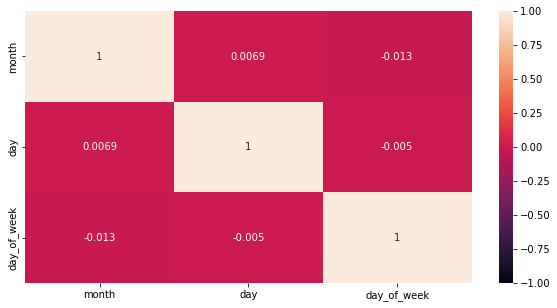

In [189]:
corr=groceries.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);
#vmin-min value of the variable
#vmax-max value of the variable

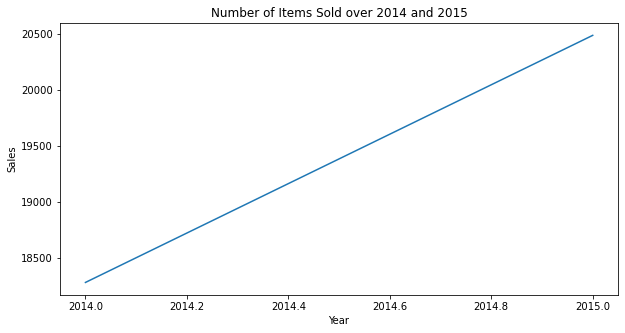

In [190]:
sales_df= groceries.groupby('year')['itemDescription'].count().reset_index()
sales_df.head()

sns.lineplot(data= sales_df, x='year', y='itemDescription')
plt.title("Number of Items Sold over 2014 and 2015")
plt.xlabel('Year')
plt.ylabel('Sales');

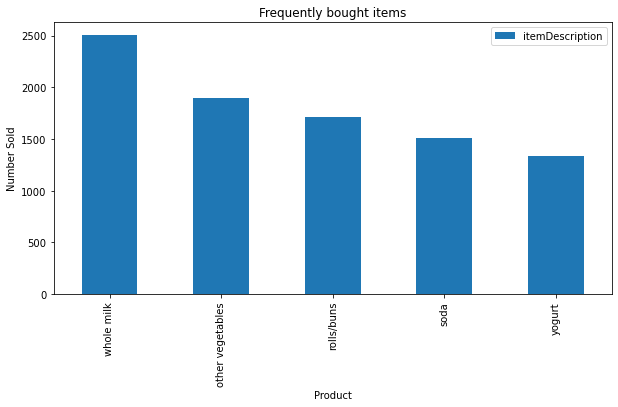

In [191]:
groceries.itemDescription.value_counts(ascending=False).reset_index().head(5).plot(kind='bar', x='index')
plt.title("Frequently bought items")
plt.xlabel('Product')
plt.ylabel('Number Sold');

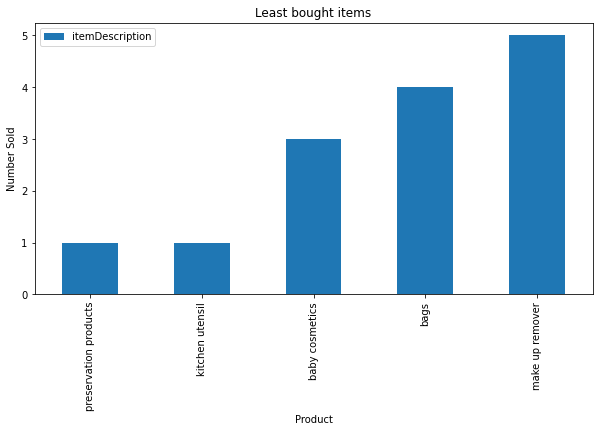

In [192]:
groceries.itemDescription.value_counts(ascending=True).reset_index().head(5).plot(kind='bar', x='index')
plt.title("Least bought items")
plt.xlabel('Product')
plt.ylabel('Number Sold');

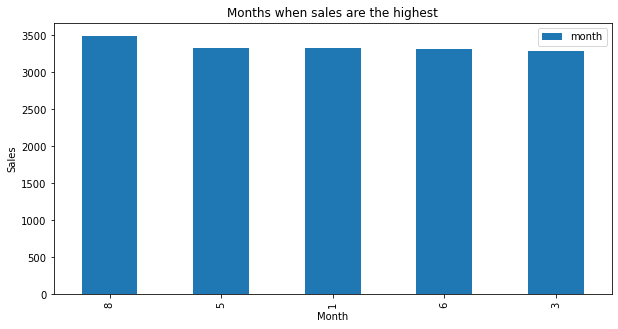

In [193]:
groceries.month.value_counts(ascending=False).reset_index().head(5).plot(kind='bar', x='index')
plt.title("Months when sales are the highest")
plt.xlabel('Month')
plt.ylabel('Sales');

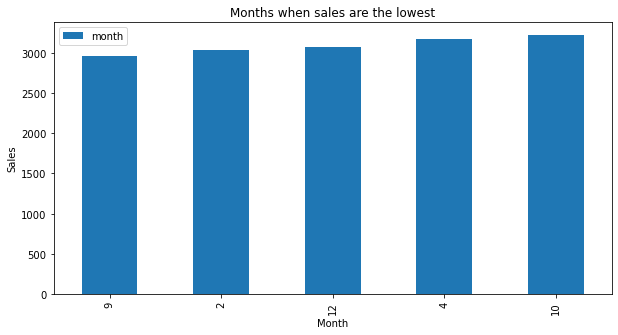

In [194]:
groceries.month.value_counts(ascending=True).reset_index().head(5).plot(kind='bar', x='index')
plt.title("Months when sales are the lowest")
plt.xlabel('Month')
plt.ylabel('Sales');

## Apriori Algorithm Implementation


In [244]:
#Extracting distinct member numbers, creating a list of transactions made by each one of them
memberno = groceries.Member_number.values 
date = groceries.Date.values 
sales = [list(groceries[(groceries['Member_number'] == i[0]) & (groceries['Date'] == i[1])].itemDescription) for i in zip(memberno,date)]

In [245]:
sales[1]

['whole milk', 'tropical fruit', 'chocolate']

In [266]:
#Association rule establishment - antecedent and precedent
#An association rule states that an item or group of items implies the presence of another item with some probability. Unlike decision tree rules, which predict a target, association rules simply express correlation.
#The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

from itertools import permutations
rules_asso= [i for row in sales for  i in row]
rules_asso= list(set(rules_asso))
rules = list(permutations(rules_asso,2))

In [267]:
rules[0]

('vinegar', 'organic sausage')

In [248]:
#Data encoding

from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(sales)
OHE = encoder.transform(sales)

OHE = pd.DataFrame(OHE, columns = encoder.columns_)
OHE.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,F

### Computing Support, Confidence, Zhang Metric and Lift for whole milk being bought with other vegetables, since that's the second most frequently bought item.

In [277]:
#Computing Support - indicates the probability of an item(s)  being bought in any given transaction
support_wholemilk=OHE["whole milk"].mean()
support_otherveg= OHE["other vegetables"].mean()

#support value of whole milk and other vegetables together
OHE['other vegetables & whole milk'] = np.logical_and(OHE['other vegetables'],OHE['whole milk'])
support_vegnmilk=OHE["other vegetables & whole milk"].mean()

print("Support parameter, whole milk",support_wholemilk )
print("Support parameter, other vegetables",support_otherveg)
print("Support parameter, whole milk & other vegetables",support_vegnmilk)


Support parameter, whole milk 0.18374822649297046
Support parameter, other vegetables 0.13767573842383593
Support parameter, whole milk & other vegetables 0.02233973945569457


In [278]:
#Computing Confidence - indicates the percentage of transactions that contain other vegetables that also have whole milk
conf=support_vegnmilk/support_otherveg
print("Confidence parameter, other vegetables & whole milk", conf)

Confidence parameter, other vegetables & whole milk 0.1622634438823309


In [279]:
#Lift indicates how likely whole milk is purchased with other vegetables while taking into account the frequency of whole milk sales
#If lift value >1, it means that the items are likely to be bought together and if lift value<1, they're likely to be bought separately

print("Lift parameter, other vegetables & whole milk",  conf/support_wholemilk)

Lift parameter, other vegetables & whole milk 0.883074884472632


In [281]:
#leverage indicates the difference between whole milk and other vegetables being bought together and the frequency of them being bought independent of each other

leverage=support_vegnmilk-(support_otherveg*support_wholemilk)
print("Leverage: ", Leverage)

Leverage:  0.018234851950395654


In [282]:
#Zhang Metric: It measures association as well as dissociation. Value of +1 indicates perfect association. 
#Value of -1 indicates perfect dissociation.
denom = max(support_vegnmilk*(1-support_otherveg), support_otherveg*(support_wholemilk-support_vegnmilk))
zhang_metric = leverage / denom
print("Zhang Metric" ,zhang_metric)

Zhang Metric -0.13310813455353074


## Implementation of association rules on data pruned by support metric

In [290]:
frequent_itemsets = apriori(OHE, use_colnames=True, min_support=0.01, max_len = 2)
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.054740,0.183748,0.010602,0.193685,1.054079,0.000544,1.012324,0.054276
1,(whole milk),(bottled beer),0.183748,0.054740,0.010602,0.057700,1.054079,0.000544,1.003142,0.062854
2,(whole milk),(bottled water),0.183748,0.069496,0.010473,0.056998,0.820173,-0.002296,0.986747,-0.211737
3,(bottled water),(whole milk),0.069496,0.183748,0.010473,0.150705,0.820173,-0.002296,0.961094,-0.190697
4,(whole milk),(citrus fruit),0.183748,0.060647,0.011247,0.061210,1.009278,0.000103,1.000599,0.011262


In [221]:
#distinct consequents that form itemsets with antecedents
rules.consequents.unique()

array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'citrus fruit'}),
       frozenset({'rolls/buns'}), frozenset({'other vegetables'}),
       frozenset({'sausage'}), frozenset({'soda'}), frozenset({'yogurt'}),
       frozenset({'other vegetables & whole milk'}),
       frozenset({'pastry'}), frozenset({'pip fruit'}),
       frozenset({'root vegetables'}), frozenset({'tropical fruit'})],
      dtype=object)

#### Computing Zhang's Rule to see disassociation

In [287]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
0,(bottled beer),(whole milk),0.054740,0.183748,0.010602,0.193685,1.054079,0.000544,1.012324,0.054276,0.054276
1,(whole milk),(bottled beer),0.183748,0.054740,0.010602,0.057700,1.054079,0.000544,1.003142,0.062854,0.062854
2,(whole milk),(bottled water),0.183748,0.069496,0.010473,0.056998,0.820173,-0.002296,0.986747,-0.211737,-0.211737
3,(bottled water),(whole milk),0.069496,0.183748,0.010473,0.150705,0.820173,-0.002296,0.961094,-0.190697,-0.190697
4,(whole milk),(citrus fruit),0.183748,0.060647,0.011247,0.061210,1.009278,0.000103,1.000599,0.011262,0.011262


In [223]:
 #disassociation
rules[rules.zhang<=0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
2,(whole milk),(bottled water),0.183748,0.069496,0.010473,0.056998,0.820173,-0.002296,0.986747,-0.211737,-0.211737
3,(bottled water),(whole milk),0.069496,0.183748,0.010473,0.150705,0.820173,-0.002296,0.961094,-0.190697,-0.190697
6,(other vegetables),(rolls/buns),0.137676,0.127950,0.016097,0.116920,0.913788,-0.001519,0.987509,-0.098619,-0.098619
7,(rolls/buns),(other vegetables),0.127950,0.137676,0.016097,0.125806,0.913788,-0.001519,0.986423,-0.097626,-0.097626
10,(other vegetables),(soda),0.137676,0.112266,0.014162,0.102867,0.916275,-0.001294,0.989523,-0.095811,-0.095811
11,(soda),(other vegetables),0.112266,0.137676,0.014162,0.126149,0.916275,-0.001294,0.986809,-0.093325,-0.093325
12,(other vegetables),(whole milk),0.137676,0.183748,0.022340,0.162263,0.883075,-0.002958,0.974354,-0.133108,-0.133108
13,(whole milk),(other vegetables),0.183748,0.137676,0.022340,0.121578,0.883075,-0.002958,0.981674,-0.139573,-0.139573
14,(other vegetables),(yogurt),0.137676,0.101432,0.012589,0.091437,0.901465,-0.001376,0.989000,-0.112497,-0.112497
15,(yogurt),(other vegetables),0.101432,0.137676,0.012589,0.124110,0.901465,-0.001376,0.984512,-0.108451,-0.108451


In [224]:
#positive association
rules[rules.zhang>0].sort_values('zhang', ascending=False) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
16,(other vegetables),(other vegetables & whole milk),0.137676,0.022340,0.022340,0.162263,7.263444,0.019264,1.167026,1.000000,1.000000
42,(whole milk),(other vegetables & whole milk),0.183748,0.022340,0.022340,0.121578,5.442229,0.018235,1.112973,1.000000,1.000000
17,(other vegetables & whole milk),(other vegetables),0.022340,0.137676,0.022340,1.000000,7.263444,0.019264,inf,0.882029,0.882029
43,(other vegetables & whole milk),(whole milk),0.022340,0.183748,0.022340,1.000000,5.442229,0.018235,inf,0.834903,0.834903
35,(yogurt),(sausage),0.101432,0.074578,0.010215,0.100712,1.350434,0.002651,1.029061,0.288790,0.288790
34,(sausage),(yogurt),0.074578,0.101432,0.010215,0.136977,1.350434,0.002651,1.041187,0.280410,0.280410
30,(soda),(sausage),0.112266,0.074578,0.010086,0.089844,1.204702,0.001714,1.016773,0.191408,0.191408
31,(sausage),(soda),0.074578,0.112266,0.010086,0.135247,1.204702,0.001714,1.026575,0.183612,0.183612
32,(whole milk),(sausage),0.183748,0.074578,0.015246,0.082971,1.112542,0.001542,1.009152,0.123929,0.123929
33,(sausage),(whole milk),0.074578,0.183748,0.015246,0.204428,1.112542,0.001542,1.025993,0.109309,0.109309


## Implementation of association rules on data pruned by leverage metric

In [289]:
rules = association_rules(frequent_itemsets,metric = "leverage", min_threshold = 0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(other vegetables & whole milk),0.137676,0.022340,0.02234,0.162263,7.263444,0.019264,1.167026,1.000000
1,(other vegetables & whole milk),(other vegetables),0.022340,0.137676,0.02234,1.000000,7.263444,0.019264,inf,0.882029
2,(whole milk),(other vegetables & whole milk),0.183748,0.022340,0.02234,0.121578,5.442229,0.018235,1.112973,1.000000
3,(other vegetables & whole milk),(whole milk),0.022340,0.183748,0.02234,1.000000,5.442229,0.018235,inf,0.834903


In [226]:
#distinct consequents
rules.consequents.unique()

array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'citrus fruit'}), frozenset({'sausage'}),
       frozenset({'other vegetables'}),
       frozenset({'other vegetables & whole milk'}), frozenset({'soda'}),
       frozenset({'yogurt'})], dtype=object)

### Multimetric filtering considering only the consequent 'whole milk'

In [291]:
cons_wm = rules[rules['consequents'] == {'whole milk'}].copy()
cons_wm

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.054740,0.183748,0.010602,0.193685,1.054079,0.000544,1.012324,0.054276
3,(bottled water),(whole milk),0.069496,0.183748,0.010473,0.150705,0.820173,-0.002296,0.961094,-0.190697
5,(citrus fruit),(whole milk),0.060647,0.183748,0.011247,0.185453,1.009278,0.000103,1.002093,0.009786
12,(other vegetables),(whole milk),0.137676,0.183748,0.022340,0.162263,0.883075,-0.002958,0.974354,-0.133108
18,(pastry),(whole milk),0.060622,0.183748,0.010680,0.176170,0.958759,-0.000459,0.990801,-0.043786
21,(pip fruit),(whole milk),0.057707,0.183748,0.010215,0.177023,0.963399,-0.000388,0.991828,-0.038756
25,(rolls/buns),(whole milk),0.127950,0.183748,0.022237,0.173790,0.945807,-0.001274,0.987947,-0.061654
29,(root vegetables),(whole milk),0.079402,0.183748,0.011273,0.141975,0.772662,-0.003317,0.951315,-0.242197
33,(sausage),(whole milk),0.074578,0.183748,0.015246,0.204428,1.112542,0.001542,1.025993,0.109309
36,(soda),(whole milk),0.112266,0.183748,0.018522,0.164982,0.897868,-0.002107,0.977526,-0.113581


In [296]:
significant_rules = cons_wm[(cons_wm['antecedent support'] > 0.01) &
(cons_wm['support'] > 0.009) &
(cons_wm['confidence'] > 0.85) &
(cons_wm['lift'] > 1.00)]

print(significant_rules['antecedents'])

43    (other vegetables & whole milk)
Name: antecedents, dtype: object


### Visualising the rules

In [304]:
freq_items = apriori(OHE, min_support=0.01,use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

In [305]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

print(rules[['antecedents','consequents']].head())

     antecedents    consequents
0   bottled beer     whole milk
1     whole milk   bottled beer
2     whole milk  bottled water
3  bottled water     whole milk
4     whole milk   citrus fruit


In [306]:
support_table = rules.pivot(index='consequents', columns='antecedents',values='support')
support_table.head()

antecedents,bottled beer,bottled water,citrus fruit,other vegetables,other vegetables & whole milk,pastry,pip fruit,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt
consequents,,,,,,,,,,,,,,
bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010602,NaN
bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010473,NaN
citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011247,NaN
other vegetables,NaN,NaN,NaN,NaN,0.02234,NaN,NaN,0.016097,NaN,0.011118,0.014162,NaN,0.022340,0.012589
other vegetables & whole milk,NaN,NaN,NaN,0.02234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022340,NaN


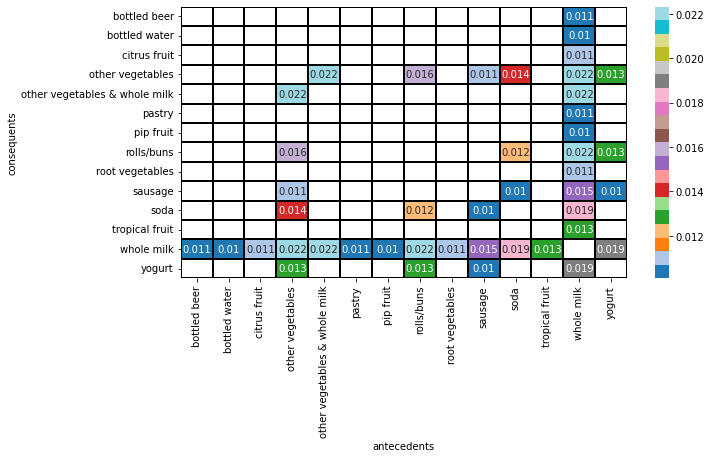

In [307]:
sns.heatmap(support_table, cmap= "tab20", annot=True, linewidths= 2, linecolor= 'black');

#Whole milk is associated with other vegetables
#Whole milk is associated with rolls/buns